In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

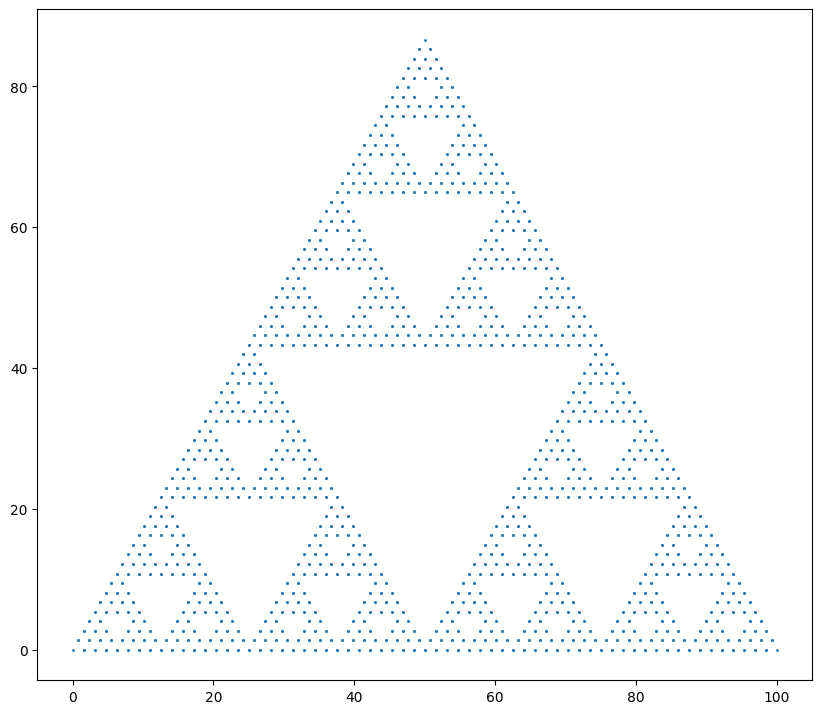

In [2]:
def midpoint(p1, p2):
    return ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)

def sierpinski_triangle(p1, p2, p3, depth):
    if depth == 0:
        return [p1, p2, p3]
    
    mid1 = midpoint(p1, p2)
    mid2 = midpoint(p2, p3)
    mid3 = midpoint(p1, p3)
    
    points = []
    points.extend(sierpinski_triangle(p1, mid1, mid3, depth-1))
    points.extend(sierpinski_triangle(mid1, p2, mid2, depth-1))
    points.extend(sierpinski_triangle(mid3, mid2, p3, depth-1))
  
    return points

# Исходный треугольник
triangle_points = [(0, 0), (100, 0), (50, 86.6)]

# Генерация точек для треугольника Серпинского
points = sierpinski_triangle(*triangle_points, depth=6)

# Отображение точек
x_global, y_global = zip(*points)
plt.figure(figsize=(10,10))
plt.scatter(x_global, y_global, s=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

<Figure size 640x480 with 0 Axes>

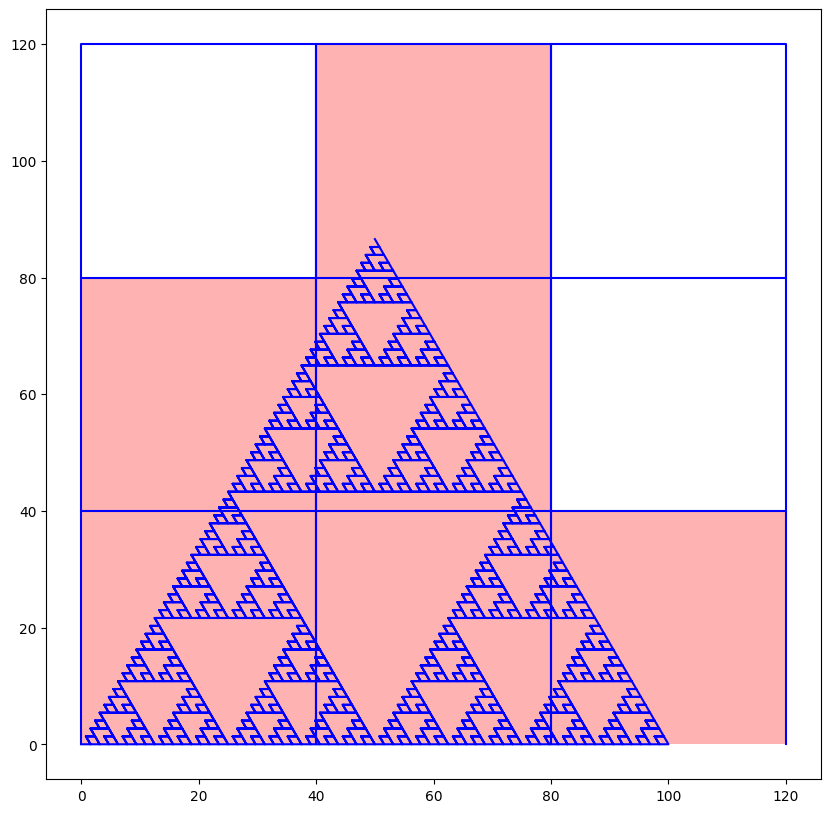

<Figure size 640x480 with 0 Axes>

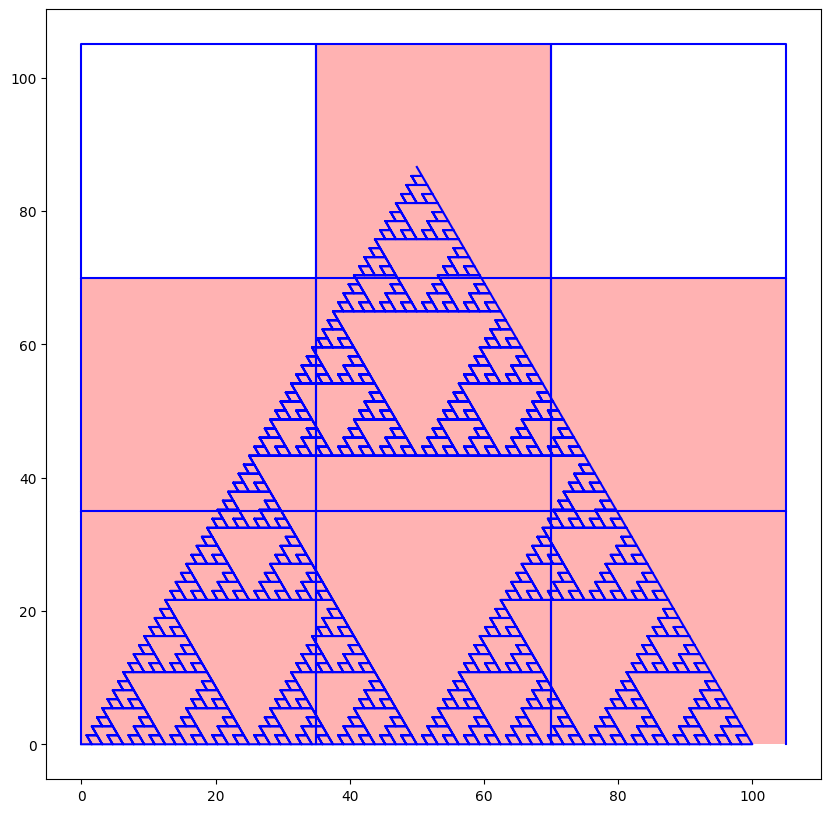

<Figure size 640x480 with 0 Axes>

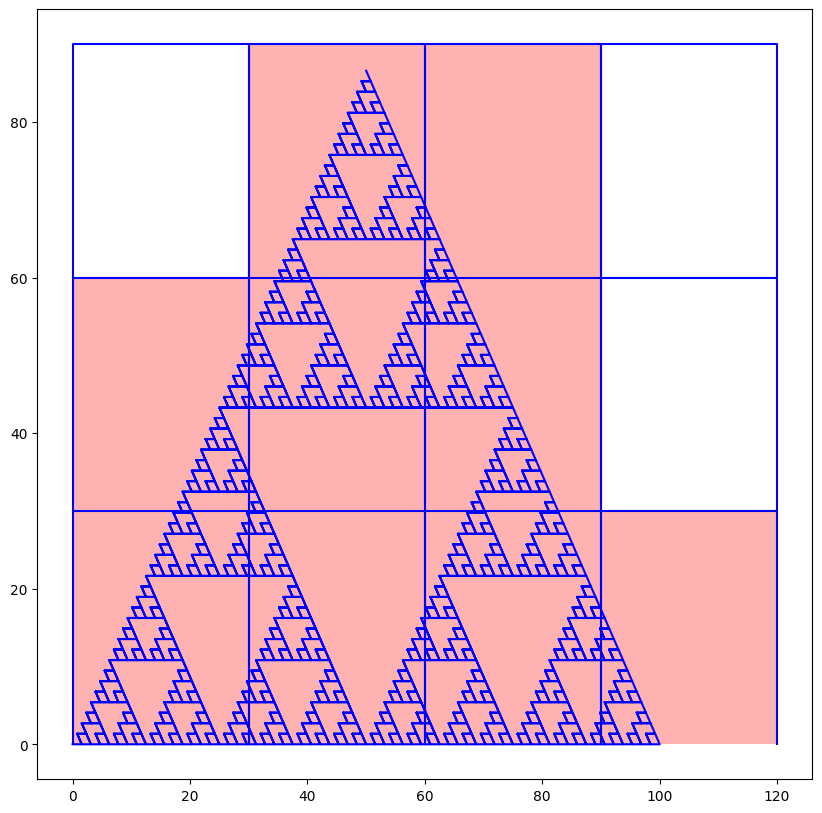

<Figure size 640x480 with 0 Axes>

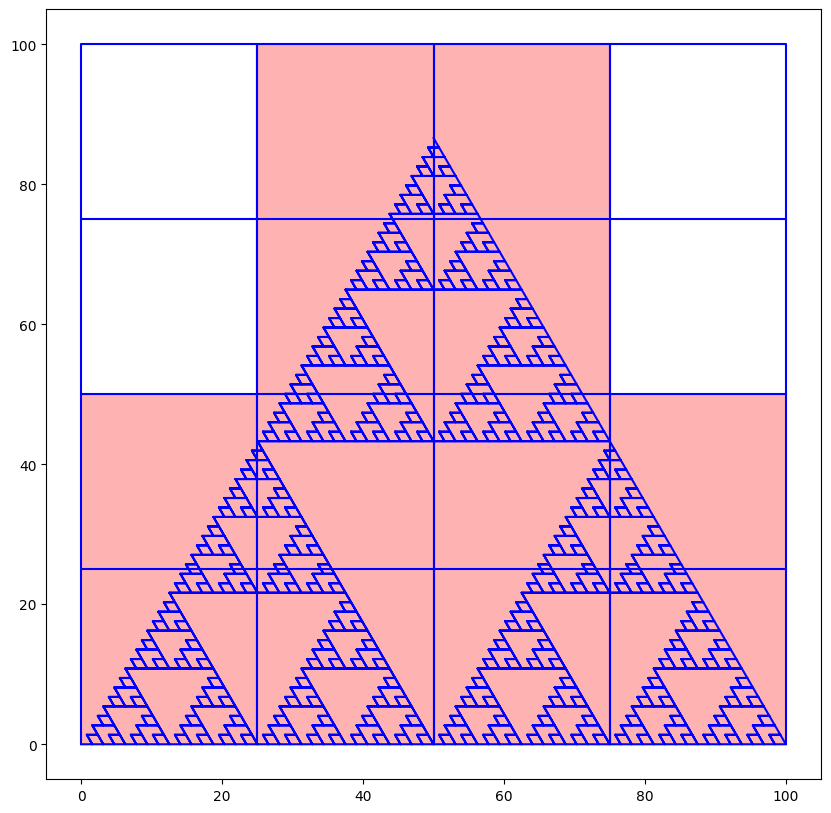

<Figure size 640x480 with 0 Axes>

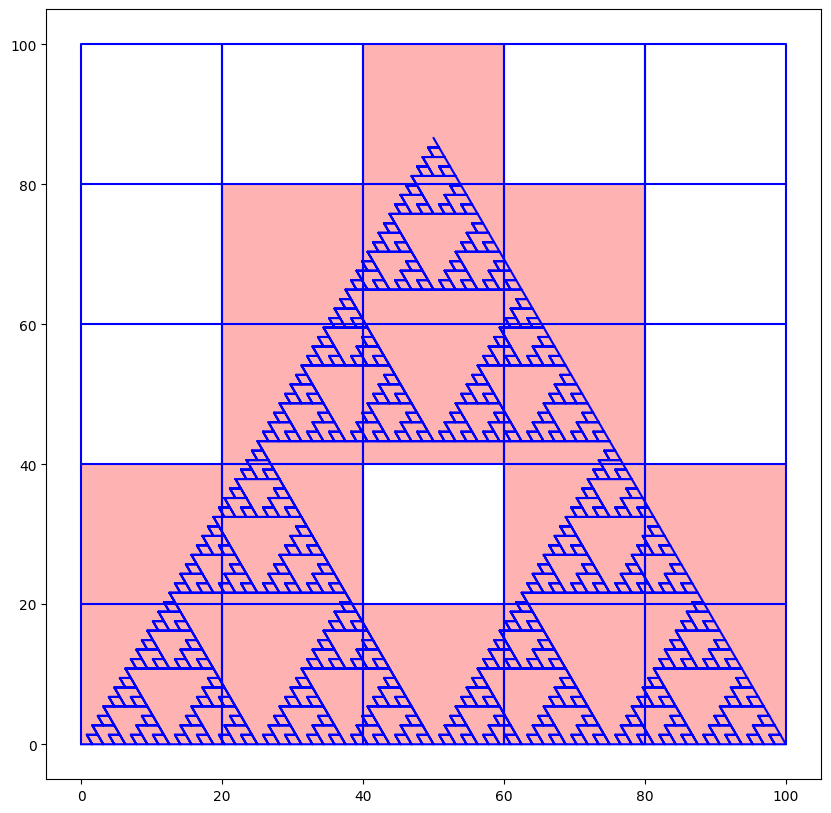

<Figure size 640x480 with 0 Axes>

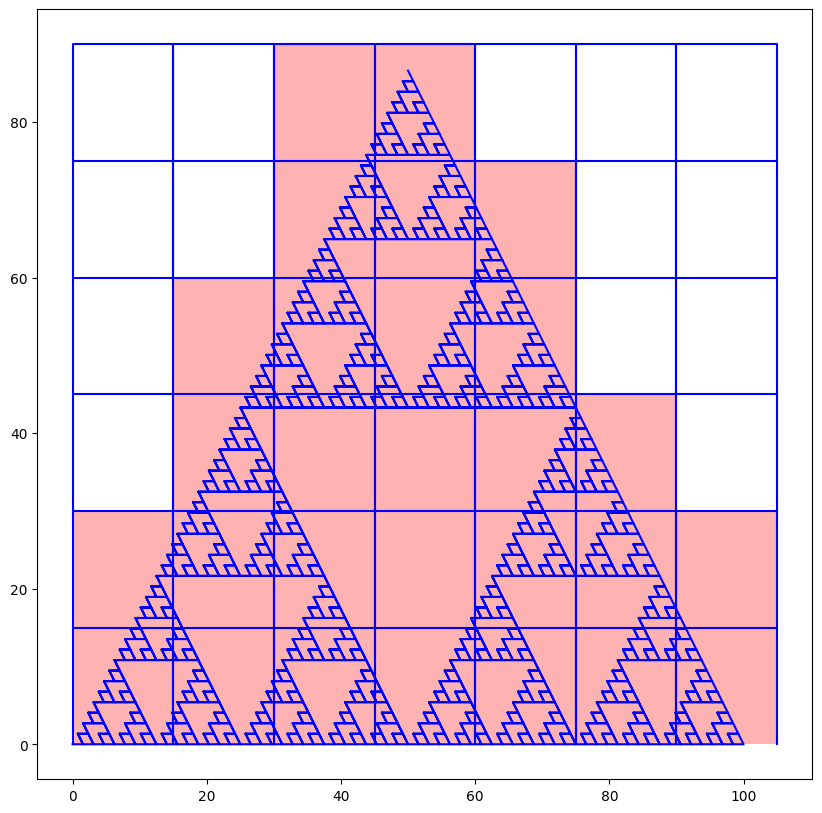

<Figure size 640x480 with 0 Axes>

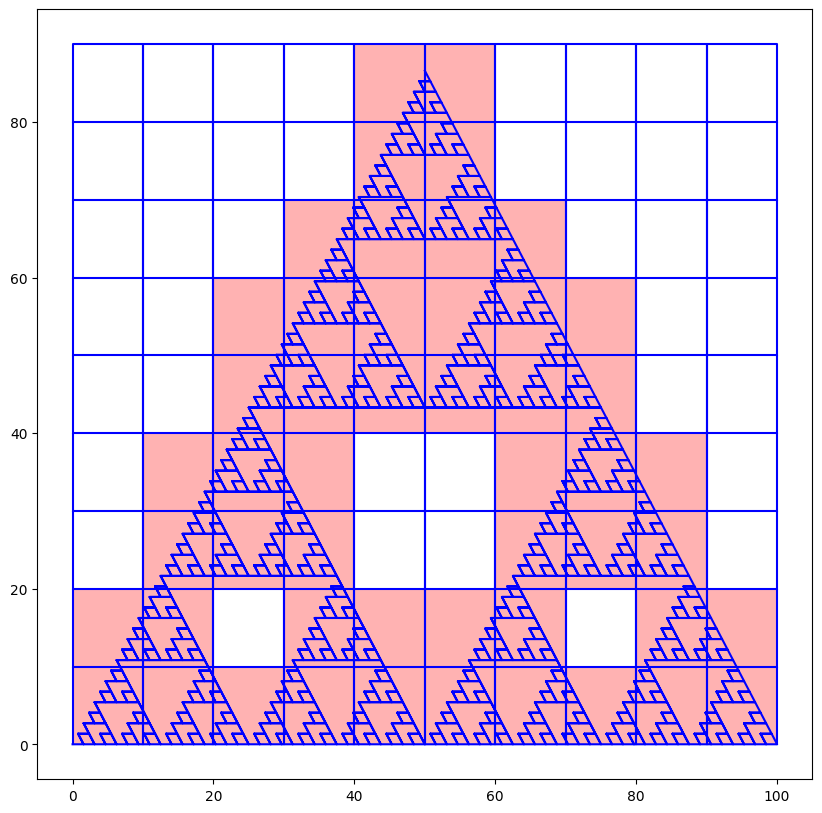

<Figure size 640x480 with 0 Axes>

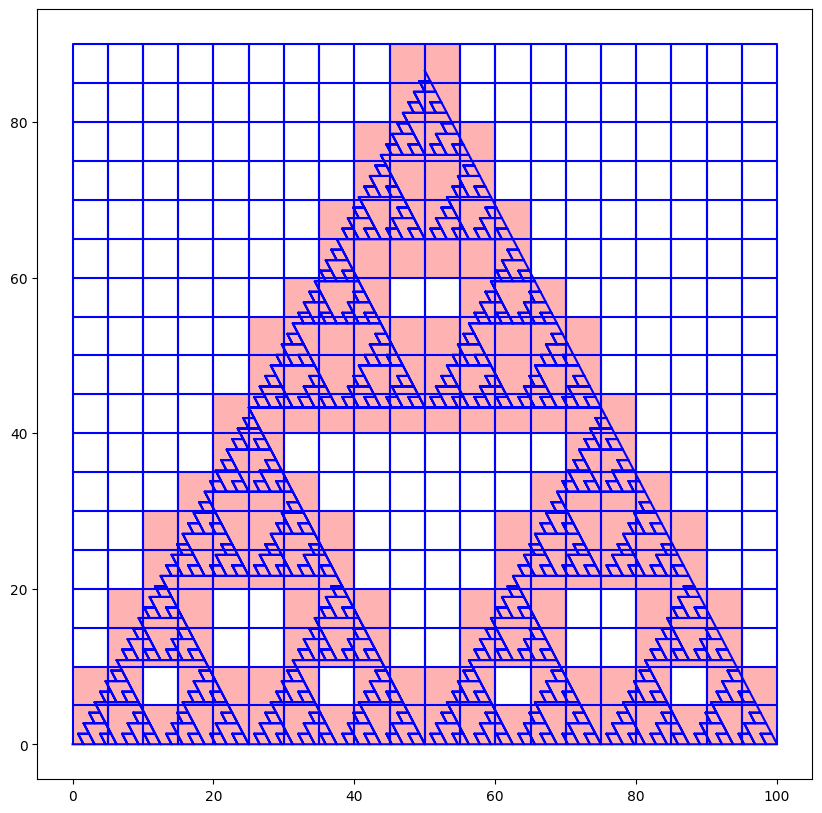

<Figure size 640x480 with 0 Axes>

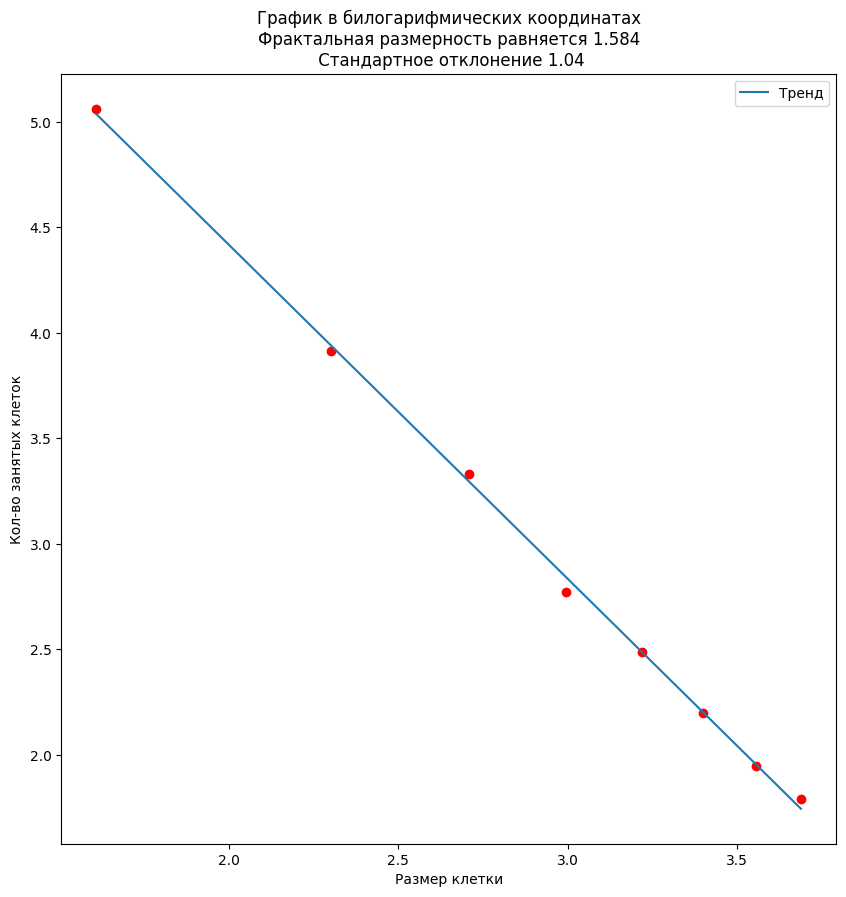

In [3]:
coords = np.array([(i,j) for i,j in zip(x_global,y_global)])

x_min = int(min(x_global))
y_min = int(min(y_global))

x_max = int(max(x_global))
y_max = int(max(y_global))

steps = [5, 10, 15, 20, 25, 30, 35, 40]

dimension = dict()

for step in steps[::-1]:
    count = 0

    plt.clf()
    plt.figure(figsize=(10,10))
    plt.plot(x_global, y_global, color='b')
    
    for i in range(x_min, x_max, step):
        for j in range(y_min, y_max, step):

            x0 = i
            x1 = i+step
            y0 = j
            y1 = j+step
            
            indices = np.where((coords[:,0] >= x0) & (coords[:,0] <= x1) & (coords[:,1] >= y0) & (coords[:,1] <= y1))[0]
            

            plt.plot([x0, x0, x1, x1], [y0, y1, y1, y0], 'b')
            if len(indices):
                count+=1
                plt.fill([x0, x0, x1, x1], [y0, y1, y1, y0], 'r', alpha=0.3)

    plt.show()
    plt.savefig(rf'C:\Users\Евгений\Desktop\Science\Изображения\{step}.png')
    
    dimension[step] = count

x = [math.log(i) for i in dimension]
y = [math.log(i) for i in dimension.values()]
# Определяем тренд
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# Расчет размерности и стандартного отклонения
D = round(p[1] * (-1), 3)
std = round(np.std(y), 2)

plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(x, y, color='red')
plt.plot(x, p(x), label='Тренд')
plt.legend()
plt.xlabel('Размер клетки')
plt.ylabel('Кол-во занятых клеток')
plt.title(f"График в билогарифмических координатах\nФрактальная размерность равняется {D}\n Стандартное отклонение {std}")
plt.show()
plt.savefig(rf'C:\Users\Евгений\Desktop\Science\Изображения\Размерность.png')
plt.close()